In [2]:
import mxnet as mx
import pandas as pd
from sklearn.model_selection import train_test_split

### Basic Statistics

In [3]:
# Read data and basic statistics
hr_data = pd.read_csv("data/hr.csv")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Preparation

In [6]:
# Convert some variables to factors
hr_data[['Work_accident', 'promotion_last_5years']] = \
    hr_data[['Work_accident', 'promotion_last_5years']].astype(object)

# Set validation parameters
sample_size = int(0.7 * hr_data.shape[0])
sample_seed = 0

# Separate data in training and testing
X = hr_data.drop(['left', 'sales', 'salary'], axis=1)
y = hr_data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=sample_size, random_state=sample_seed)

### Build Neural Net

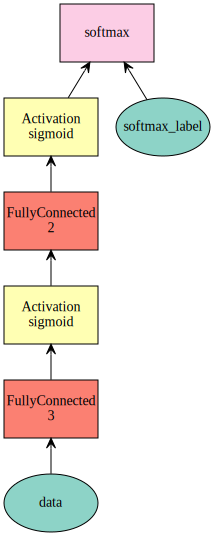

In [7]:
data = mx.symbol.Variable('data')
fc1 = mx.symbol.FullyConnected(data, name='fc1', num_hidden=3)
act1 = mx.symbol.Activation(fc1, name='sig1', act_type="sigmoid")
fc2 = mx.symbol.FullyConnected(act1, name='fc2', num_hidden=2)
act2 = mx.symbol.Activation(fc2, name='sig2', act_type="sigmoid")
mlp = mx.symbol.SoftmaxOutput(act2, name='softmax', multi_output=True)

mx.viz.plot_network(mlp)

### Train the net

In [ ]:
import logging
logging.basicConfig(level=logging.INFO)

mod = mx.mod.Module(symbol=mlp, context=mx.cpu(), data_names=['data'], label_names=['softmax_label'])

batch_size = 5
learning_rate = 0.03

nd_iter = mx.io.NDArrayIter(data={'data':X_train.values},
                            label={'softmax_label':y_train.values},
                            batch_size=batch_size)

mod.fit(nd_iter,
        optimizer='sgd',
        optimizer_params={'learning_rate':learning_rate},
        eval_metric='accuracy',
        num_epoch=2)

In [36]:
import numpy as np
np.array(X.values)

array([[0.38, 0.53, 2, ..., 0, 'sales', 'low'],
       [0.8, 0.86, 5, ..., 0, 'sales', 'medium'],
       [0.11, 0.88, 7, ..., 0, 'sales', 'medium'],
       ..., 
       [0.37, 0.53, 2, ..., 0, 'support', 'low'],
       [0.11, 0.96, 6, ..., 0, 'support', 'low'],
       [0.37, 0.52, 2, ..., 0, 'support', 'low']], dtype=object)